In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [91]:
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\dinka\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [92]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression     
from sklearn.metrics import mean_squared_error, r2_score  

In [93]:
#df=pd.read_csv('D:\Machine learning\DataSet\Housing.csv')
# or 
df = pd.read_csv("../DataSet/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [94]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [95]:
df.shape

(545, 13)

In [96]:
#df.isnull().any()
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [97]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [98]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [99]:
df['mainroad'].unique()

array(['yes', 'no'], dtype=object)

In [100]:
df['mainroad']=df['mainroad'].replace({'yes':1,'no':0}).astype(int)

C:\Users\dinka\AppData\Local\Temp\ipykernel_2024\2551227996.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['mainroad']=df['mainroad'].replace({'yes':1,'no':0}).astype(int)


In [101]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished


In [102]:
df['guestroom'].unique()
df['guestroom']=df['guestroom'].replace({'yes':1,'no':0}).astype(int)

C:\Users\dinka\AppData\Local\Temp\ipykernel_2024\2949195655.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['guestroom']=df['guestroom'].replace({'yes':1,'no':0}).astype(int)


In [103]:
df['basement'].unique()

df['basement']=df['basement'].replace({'yes':1,'no':0}).astype(int)

C:\Users\dinka\AppData\Local\Temp\ipykernel_2024\901525708.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['basement']=df['basement'].replace({'yes':1,'no':0}).astype(int)


In [104]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,no,yes,2,no,furnished


In [105]:
l=['hotwaterheating','airconditioning','prefarea','furnishingstatus']

In [106]:


for i in l:
    print(i, df[i].unique())


hotwaterheating ['no' 'yes']
airconditioning ['yes' 'no']
prefarea ['yes' 'no']
furnishingstatus ['furnished' 'semi-furnished' 'unfurnished']


In [107]:
l2=['hotwaterheating','airconditioning','prefarea']
for i in l2:
    df[i]=df[i].replace({'yes':1,'no':0}).astype(int)


C:\Users\dinka\AppData\Local\Temp\ipykernel_2024\2776397701.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i]=df[i].replace({'yes':1,'no':0}).astype(int)
C:\Users\dinka\AppData\Local\Temp\ipykernel_2024\2776397701.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i]=df[i].replace({'yes':1,'no':0}).astype(int)
C:\Users\dinka\AppData\Local\Temp\ipykernel_2024\2776397701.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly cal

In [108]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [109]:
mapping = {
    'furnished': 1,
    'semi-furnished': 2,
    'unfurnished': 3
}

df['furnishingstatus'] = df['furnishingstatus'].map(mapping).astype(int)


In [110]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


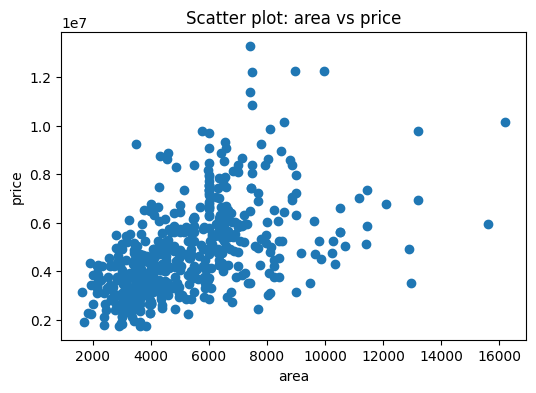

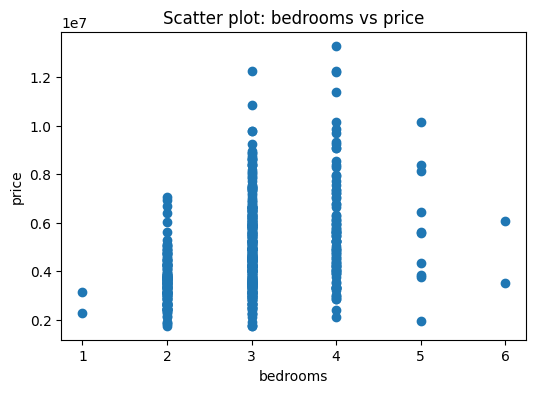

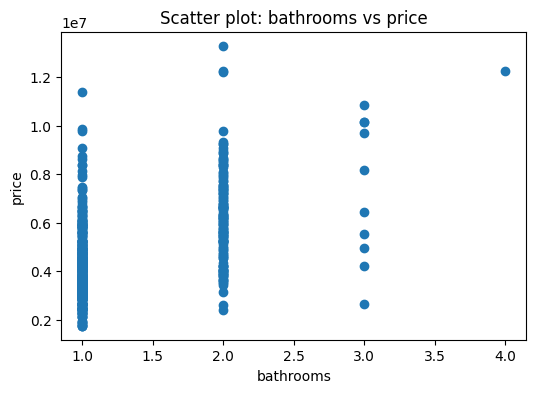

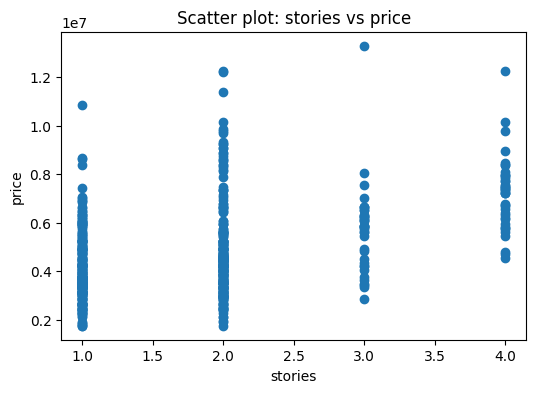

In [111]:
target = 'price'       
features = ['area', 'bedrooms', 'bathrooms','stories']

for col in features:
    plt.figure(figsize=(6,4))
    plt.scatter(df[col], df[target])
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f'Scatter plot: {col} vs {target}')
    plt.show()


In [112]:
df['area_log'] = np.log1p(df['area'])


In [113]:
df['bathrooms/bedrooms']=df['bathrooms']/df['bedrooms']
df.drop('bathrooms',axis=1)
df.drop('bedrooms',axis=1)
df.drop('area',axis=1)
df.drop('hotwaterheating',axis=1)
df.drop('airconditioning',axis=1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,parking,prefarea,furnishingstatus,area_log,bathrooms/bedrooms
0,13300000,7420,4,2,3,1,0,0,0,2,1,1,8.912069,0.500000
1,12250000,8960,4,4,4,1,0,0,0,3,0,1,9.100637,1.000000
2,12250000,9960,3,2,2,1,0,1,0,2,1,2,9.206433,0.666667
3,12215000,7500,4,2,2,1,0,1,0,3,1,1,8.922792,0.500000
4,11410000,7420,4,1,2,1,1,1,0,2,0,1,8.912069,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,2,0,3,8.006701,0.500000
541,1767150,2400,3,1,1,0,0,0,0,0,0,2,7.783641,0.333333
542,1750000,3620,2,1,1,1,0,0,0,0,0,3,8.194506,0.500000
543,1750000,2910,3,1,1,0,0,0,0,0,0,1,7.976252,0.333333


In [114]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_log,bathrooms/bedrooms
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,8.912069,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,9.100637,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2,9.206433,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,8.922792,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,8.912069,0.250000


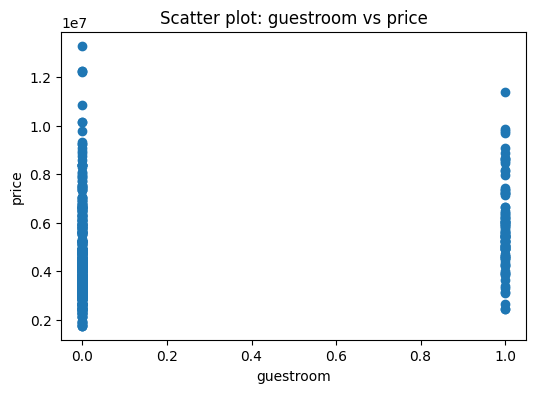

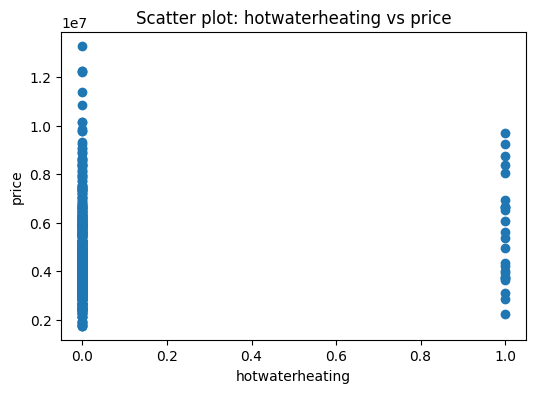

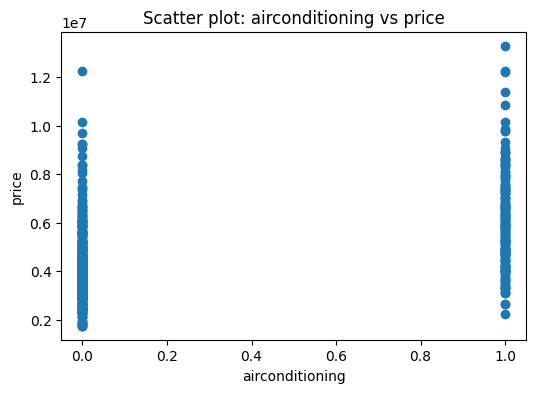

In [115]:
target = 'price'       
features = ['guestroom','hotwaterheating','airconditioning']

for col in features:
    plt.figure(figsize=(6,4))
    plt.scatter(df[col], df[target])
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f'Scatter plot: {col} vs {target}')
    plt.show()


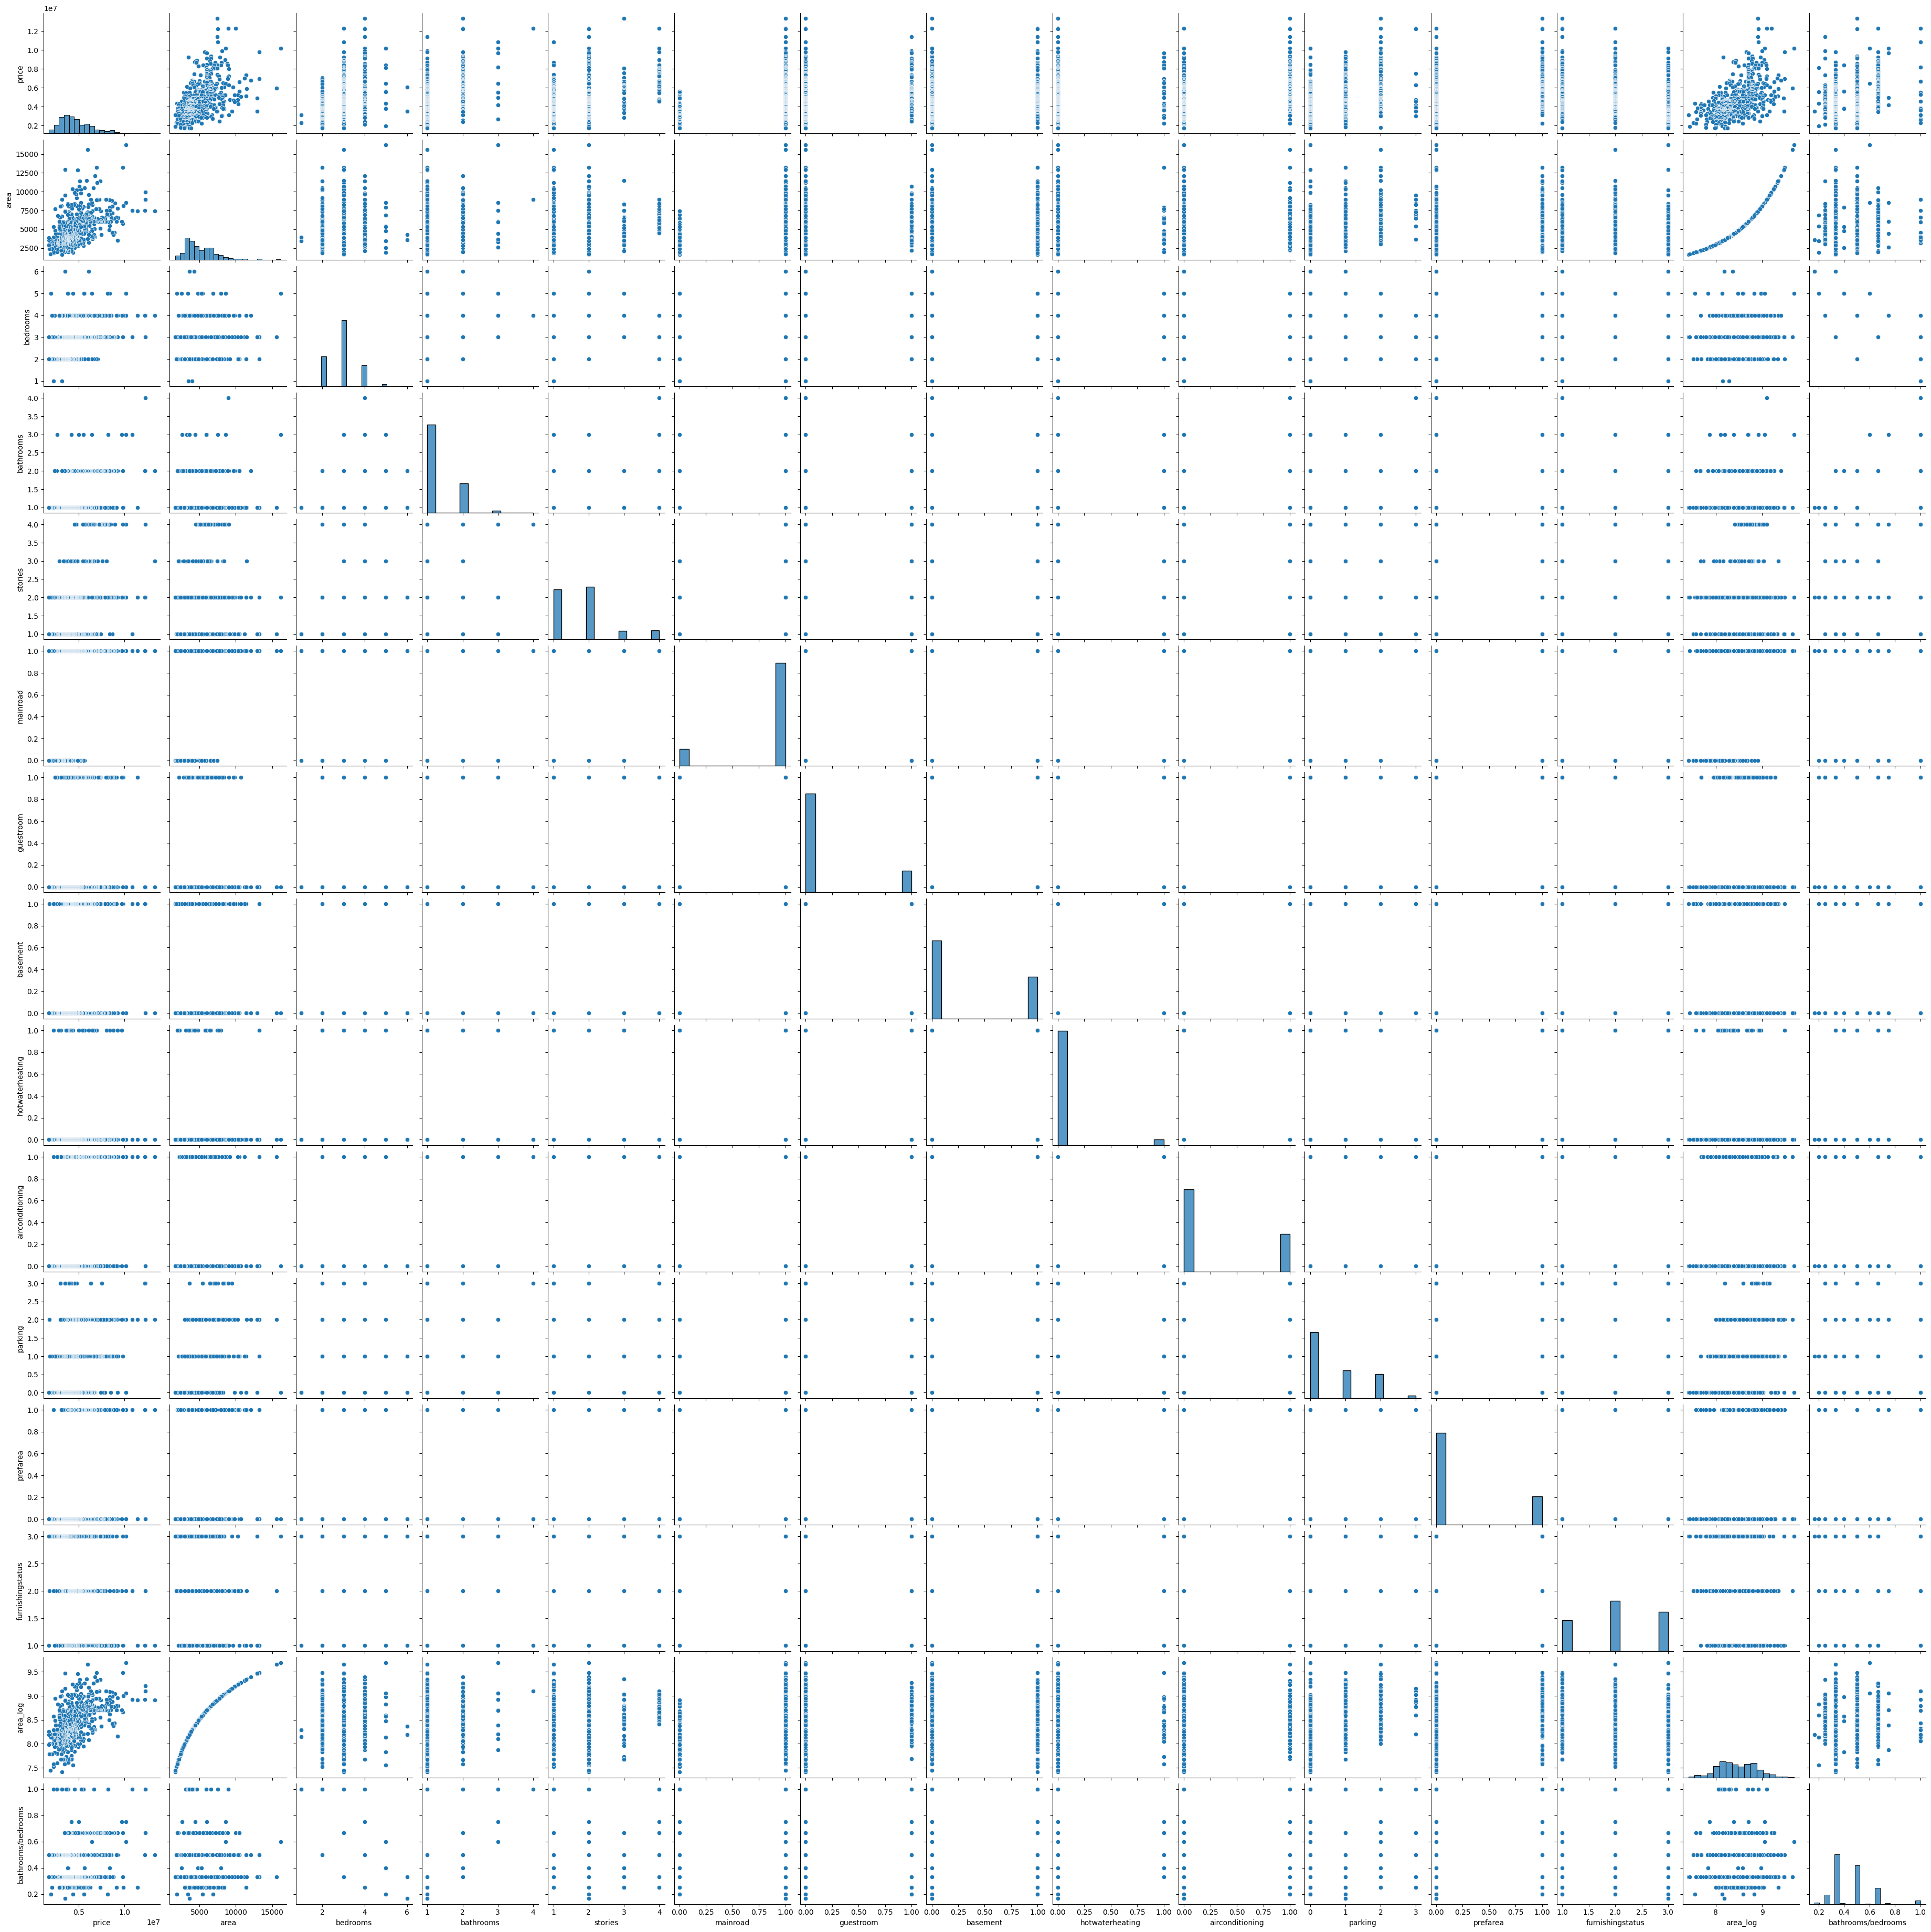

In [116]:
sns.pairplot(df)

In [117]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_log,bathrooms/bedrooms
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,8.912069,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,9.100637,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2,9.206433,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,8.922792,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,8.912069,0.250000


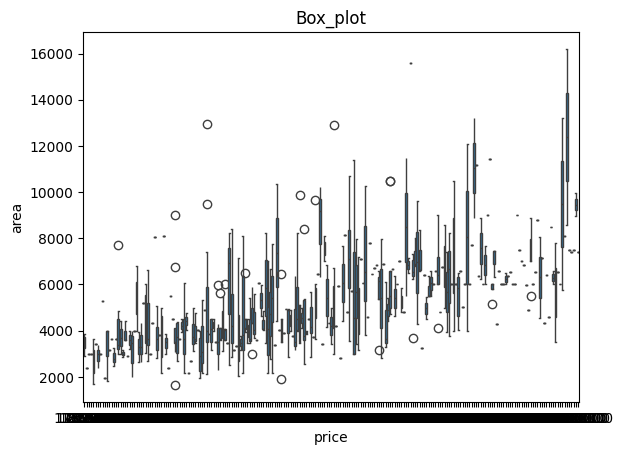

In [118]:
sns.boxplot(x='price',y='area',data=df)
plt.title("Box_plot")
plt.show()

In [119]:


# Calculate IQR for 'area'
q1 = df['area'].quantile(0.25)
q3 = df['area'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Calculate mean of 'area' excluding outliers
filtered_area = df[(df['area'] >= lower_bound) & (df['area'] <= upper_bound)]['area']
mean_area = filtered_area.mean()

# Replace outliers with mean_area
def replace_outliers(val):
    if val < lower_bound or val > upper_bound:
        return mean_area
    else:
        return val

df['area_cleaned'] = df['area'].apply(replace_outliers)


<Axes: >

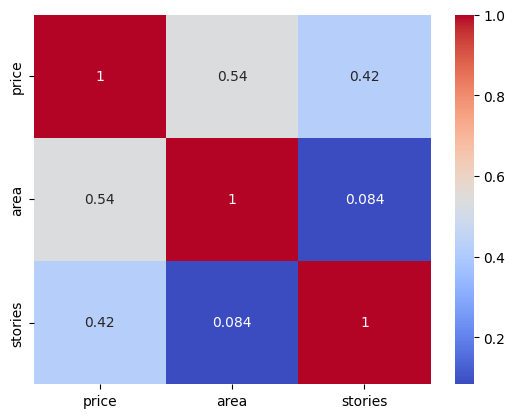

In [120]:
corr=df[['price','area','stories']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [121]:
X = df.drop('price', axis=1)  # Replace with your actual target column
y = df['price']

In [122]:
# 2. Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [123]:
# 3. Create and train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [124]:
# 4. Make predictions
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [125]:
print(y_pred)

[5503426.07283559 7373950.59516218 3125861.18053289 4677212.24739429
 3443000.38331403 3706433.87184206 5597452.0224548  6592202.62464444
 2703309.64903722 2615978.77885211 9627652.42514973 2858671.95303769
 3266439.23624112 3415241.36023429 3801892.0194059  5296019.01612269
 2424720.95818233 4907148.8084788  4556140.87897286 3673207.52474125
 5915429.18041194 5929881.85029287 2746974.9522459  4781394.07731547
 5230405.30212416 7332225.27732369 3071806.43908345 5057420.03091549
 7781137.08312315 3301699.69714544 6498806.52093501 3238629.20359152
 6769964.10710167 4312527.88403041 3615732.06667177 5834251.6211805
 4848852.78107323 4163003.50229941 3284603.14471504 4482629.96760122
 4565224.38326481 3471363.20127982 7358433.11180438 4140475.22082983
 3821737.7086443  4366314.20086819 6775314.59717342 4017749.55327145
 3800162.32591463 3290451.09324777 7246130.94190467 2662174.22206533
 4430748.32201891 4702042.05371209 3635975.01983159 2733643.22538112
 7535807.33930758 2610950.05251725 

In [126]:
# Predict on train data
y_train_pred = model.predict(X_train)

# Train scores
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test scores
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse, "| Train R²:", train_r2)
print("Test MSE:", test_mse, "| Test R²:", test_r2)


Train MSE: 941536222958.4402 | Train R²: 0.694642748109254
Test MSE: 1787055732553.488 | Test R²: 0.6464475424314237


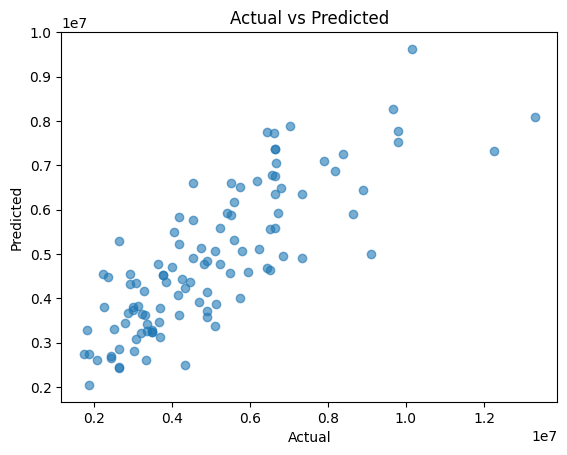

In [127]:
# 6. (Optional) Visualize predictions vs actual
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()